In [6]:
#Importing Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from datetime import datetime, time, date

## Merging 12 months data in a single file

In [7]:
# df =pd.read_csv("C:/Users/1ds/Dipti/Dipti 2/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv")

# files = [file for file in listdir('C:/Users/1ds/Dipti/Dipti 2/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

# all_months_data = pd.DataFrame()

# for file in files:
#     df =pd.read_csv('C:/Users/1ds/Dipti/Dipti 2/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
#     all_months_data = pd.concat([all_months_data, df])
    
# all_months_data.to_csv('All_DATA_25MAY.csv', index=False)

In [65]:
df =pd.read_csv('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

files = [file for file in listdir('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df =pd.read_csv('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
date_ = date.today()
print(date_)
    
all_months_data.to_csv(f'./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales Analysis _/All_DATA_{date_}.csv', index=False)



2024-05-26


In [9]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [10]:
all_months_data.shape

(186850, 6)

In [11]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Cleaning The Data

In [12]:
all_months_data.count()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [13]:
all_months_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
all_months_data.dropna(inplace =True) 

In [15]:
all_months_data.count()

Order ID            186305
Product             186305
Quantity Ordered    186305
Price Each          186305
Order Date          186305
Purchase Address    186305
dtype: int64

In [16]:
all_months_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [17]:
data = all_months_data
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [18]:

data.sort_values("Order ID")
data = data[data['Order ID'] != "Order ID"] #Removing the headers of the files which are treated as data


In [19]:
data[data.duplicated(keep='first')]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
3805,180207,Apple Airpods Headphones,1,150,04/13/19 01:46,"196 7th St, Los Angeles, CA 90001"
4196,180576,Lightning Charging Cable,1,14.95,04/18/19 17:23,"431 Park St, Dallas, TX 75001"
...,...,...,...,...,...,...
9776,257530,USB-C Charging Cable,1,11.95,09/03/19 11:13,"192 Johnson St, San Francisco, CA 94016"
11009,258715,Lightning Charging Cable,1,14.95,09/15/19 16:50,"550 10th St, Portland, OR 97035"
11344,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"
11618,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [20]:
data[data['Order ID'].isin(['259035','177795','257530'])] #checking for duplicates again

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1301,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
9775,257530,USB-C Charging Cable,1,11.95,09/03/19 11:13,"192 Johnson St, San Francisco, CA 94016"
9776,257530,USB-C Charging Cable,1,11.95,09/03/19 11:13,"192 Johnson St, San Francisco, CA 94016"
11343,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"
11344,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"


#### There are 264 rows of duplicate data.

In [21]:
data = data.drop_duplicates(keep='first')

In [22]:
data.count()

Order ID            185686
Product             185686
Quantity Ordered    185686
Price Each          185686
Order Date          185686
Purchase Address    185686
dtype: int64

### Adding Year, Month, Year-Month , City and Sales Column

In [23]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [24]:
data['Order Date']

0        04/19/19 08:46
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
5        04/30/19 09:27
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 185686, dtype: object

In [25]:
data['Order Date'].dtype

dtype('O')

In [26]:
data['Order Date']= pd.to_datetime(data['Order Date'])
data.head()


C:\Users\1ds\AppData\Local\Temp\ipykernel_20396\1816483003.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Order Date']= pd.to_datetime(data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [27]:
data['Order Date'].dtype

dtype('<M8[ns]')

In [28]:
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.strftime('%B')
# data['Day'] = data['Order Date'].dt.strftime('')


In [29]:
data['Year Month'] = data['Year'].map(str)+' '+ data['Month'].map(str)


In [30]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])


In [31]:

data['sales'] = data['Quantity Ordered'].map(int)*data['Price Each'].map(int)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Year Month,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019 April,22
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019 April,99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019 April,600
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019 April,11
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,April,2019 April,11


### Add a city Column

In [32]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]



data['city'] = data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
# data['state'] = data['Purchase Address'].apply(lambda x: get_state(x))

## What was the Best Month for Sales and How much was earned that Month???

In [33]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,4

In [34]:
sales_in_millions = data.groupby('Year Month')['sales'].sum().sort_values(ascending = False)/1000000
round(sales_in_millions,2)

Year Month
2019 December     4.59
2019 October      3.72
2019 April        3.37
2019 November     3.18
2019 May          3.14
2019 March        2.79
2019 July         2.63
2019 June         2.56
2019 August       2.23
2019 February     2.19
2019 September    2.08
2019 January      1.80
2020 January      0.01
Name: sales, dtype: float64

C:\Users\1ds\AppData\Local\Temp\ipykernel_20396\3822514329.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


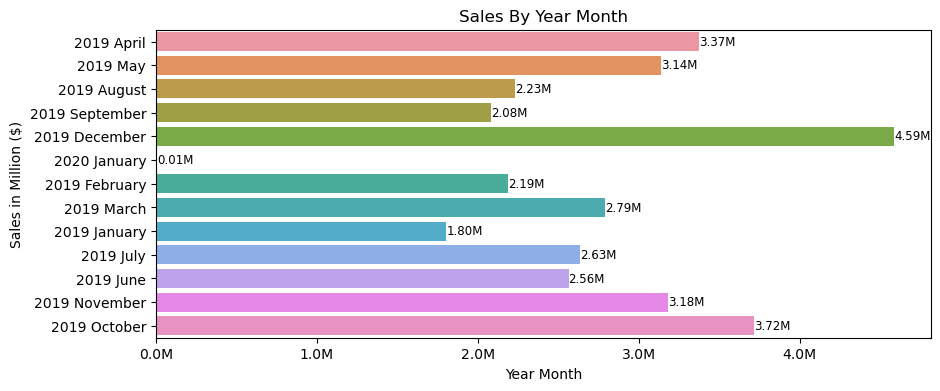

In [62]:
ax = sns.barplot(data, x='sales', y ='Year Month', estimator = 'sum',errorbar=None)

for container in ax.containers:
    labels = [f'{v/1000000:,.2f}M' for v in container.datavalues]
    ax.bar_label(container, labels=labels, fontsize=8.5)

plt.title('Sales By Year Month')
plt.xlabel('Year Month')
plt.ylabel('Sales in Million ($)')
xlabels = ['{:,.1f}'.format(x) + 'M' for x in ax.get_xticks()/1000000]
ax.set_xticklabels(xlabels)

plt.show()

#### Highest Sales was in 2019 December with the Total Sale of  $4.59M.


Interpretation:


1. Sales Trends Over Time:The data shows a trend of fluctuating sales revenue over the specified time period (from January 2019 to January 2020).
***

2. Seasonal Patterns: Certain months exhibit higher sales revenue compared to others, suggesting potential seasonal patterns or fluctuations in consumer spending behavior. For example, December 2019 has the highest sales revenue of $4.59M, which could be attributed to holiday shopping season.
***

3. Peak Months:December 2019 stands out as the peak month for sales revenue, followed by October 2019 and April 2019. These months likely correspond to peak sales periods driven by seasonal factors, promotions, or other external influences.




In [36]:
data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Year Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019 April,22,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019 April,99,Boston MA


## Which City has Highest Sales??

In [37]:
results = data.groupby('city')[['sales','Quantity Ordered']].sum().sort_values(by = 'sales', ascending = False)
results

,sales,Quantity Ordered
city,,
San Francisco CA,8216268,50169
Los Angeles CA,5422741,33247
New York City NY,4640445,27903
Boston MA,3641340,22494
Atlanta GA,2781558,16584
Dallas TX,2752536,16707
Seattle WA,2732375,16534
Portland OR,1861344,11291
Austin TX,1809528,11137


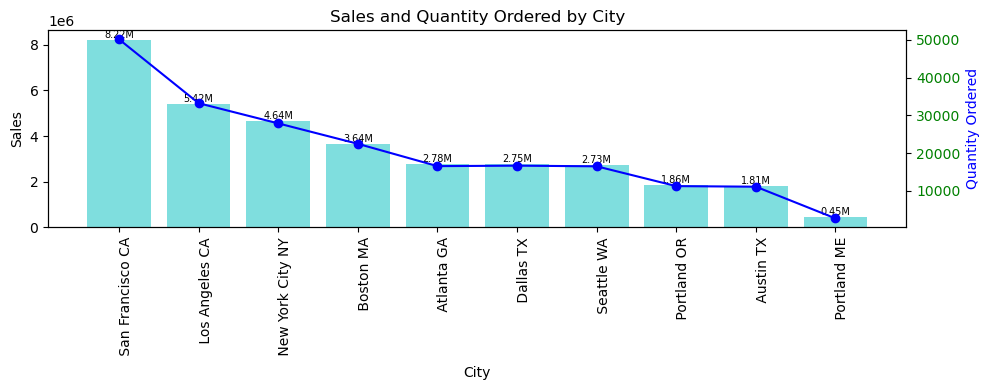

In [38]:
fig, ax1 = plt.subplots()

# Plot the sales data
bars = ax1.bar(results.index, results['sales'], color='c', alpha=0.5, label='Sales')
ax1.set_xlabel('City')
ax1.set_ylabel('Sales', color='black',)
ax1.tick_params(axis='y', labelcolor='black')
ax1.bar_label(bars, labels=[f'{val/1_000_000:.2f}M' for val in results['sales']], fontsize=7, color='black')

plt.xticks(rotation=90, ha='left')

# Create a second y-axis for Quantity Ordered
ax2 = ax1.twinx()
ax2.plot(results.index, results['Quantity Ordered'], color='blue', marker='o', label='Quantity Ordered')
ax2.set_ylabel('Quantity Ordered', color='b')
ax2.tick_params(axis='y', labelcolor='green')


# Add title and legend
plt.title('Sales and Quantity Ordered by City')
fig.tight_layout() 

plt.show()
plt.savefig('output/sales_by_year_month.png')

#### San Francisco has the Highest Sales accounting 8.02M .

San Francisco CA, leads in sales revenue, followed closely by Los Angeles CA, and New York City, NY, indicating their significance as key markets.
***

Other major metropolitan areas like Boston MA, Atlanta GA, and Dallas TX, also contribute significantly to overall sales revenue, highlighting diverse regional markets for the business.

## What time should we display advertisements to maximize likelihood of customer's buying product?

In [39]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Year Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019 April,22,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019 April,99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019 April,600,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019 April,11,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,April,2019 April,11,Los Angeles CA


In [40]:
data['Hour'] = data['Order Date'].dt.hour
data['Minute'] = data['Order Date'].dt.minute

In [41]:
data.head(2)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Year Month,sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019 April,22,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019 April,99,Boston MA,22,30


In [42]:
hours = [hour for hour, df in data.groupby('Hour')]

df =data.groupby('Hour').count().sort_values(by = 'Order ID',ascending=False)
df['Order ID'].sort_values()

Hour
3       830
4       852
2      1242
5      1320
1      2347
6      2481
0      3902
7      4002
8      6252
23     6262
9      8740
22     8808
15    10159
16    10359
17    10884
21    10905
10    10929
14    10965
13    12115
20    12218
18    12263
11    12392
12    12573
19    12886
Name: Order ID, dtype: int64

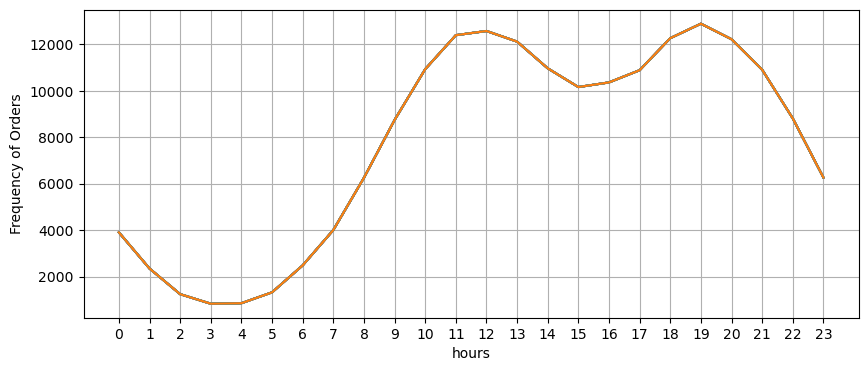

In [43]:
plt.plot(hours, data.groupby(['Hour']).count())

plt.xticks(hours)
plt.grid()
plt.xlabel('hours')
plt.ylabel('Frequency of Orders')

plt.show()

#### Interpretation

Highest Sales Hours:


The hour with the highest sales is 19:00 with 12,377 sales.
The next highest sales hour is 12:00 with 12,082 sales.


Significant Sales Hours:

Hours 11:00, 12:00, and 13:00 show high sales, with values 11,882, 12,082, and 11,682 respectively.
Hours 18:00, 19:00, and 20:00 also show high sales, with values 11,761, 12,377, and 11,763 respectively.


The highest likelihood of customer purchases occurs during the following periods:

Late Morning to Early Afternoon: 11:00 - 13:00

Evening: 18:00 - 20:00

These two periods represent peaks in sales activity based on the provided data.

Additional Insights:

There is a smaller peak around 10:00 - 11:00 with sales of 10,492 and 11,882.

The early evening also shows notable sales, particularly at 21:00 with 10,499 sales.


## What Products are mostly often sold together

In [44]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Year Month,sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,April,2019 April,22,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,April,2019 April,99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019 April,600,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,April,2019 April,11,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,April,2019 April,11,Los Angeles CA,9,27


In [45]:
df = data[data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))



C:\Users\1ds\AppData\Local\Temp\ipykernel_20396\4088336089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [46]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

In [47]:
df.head()

,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"


In [48]:
from itertools import combinations
from collections import Counter

In [49]:
count = Counter()


In [50]:
for row in df['Grouped']:
    row_list = row.split(', ')
    row_list.sort() 
    count.update(combinations(row_list,2))
for key, value in count.most_common(10):
    print(key, value)
    
# print(count)

('Lightning Charging Cable', 'iPhone') 1011
('Google Phone', 'USB-C Charging Cable') 997
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 422
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 203
('Vareebadd Phone', 'Wired Headphones') 149
('Lightning Charging Cable', 'Wired Headphones') 129


#### Customers purchasing smartphones often buy accompanying charging cables, such as USB-C or Lightning cables, to ensure convenient charging compatibility with their devices, reflecting a common consumer need for essential accessories.

## Which Product is Sold the most and why do you think is sold the most

In [51]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Year', 'Month', 'Year Month', 'sales', 'city',
       'Hour', 'Minute'],
      dtype='object')

In [52]:
product_group = data.groupby('Product')['Quantity Ordered'].sum()
product_group.sort_values()

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4126
ThinkPad Laptop                4128
Macbook Pro Laptop             4725
Flatscreen TV                  4813
Google Phone                   5529
34in Ultrawide Monitor         6192
27in 4K Gaming Monitor         6239
iPhone                         6847
27in FHD Monitor               7541
Bose SoundSport Headphones    13430
Apple Airpods Headphones      15637
Wired Headphones              20524
Lightning Charging Cable      23169
USB-C Charging Cable          23931
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Name: Quantity Ordered, dtype: int64

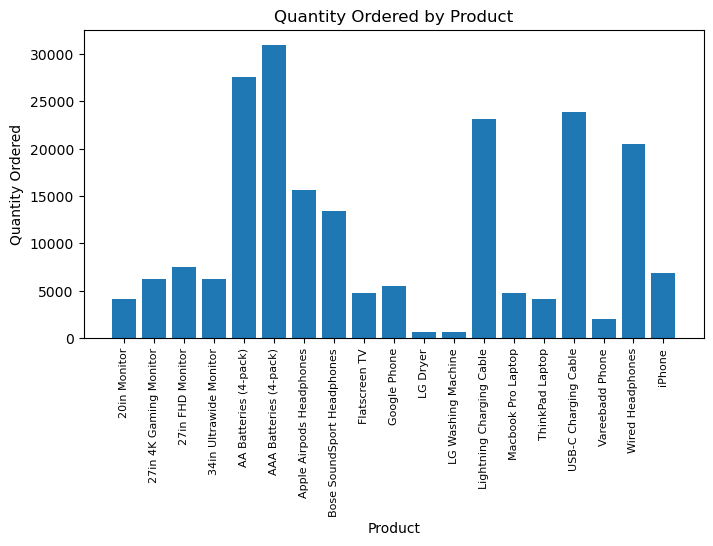

In [53]:

keys = product_group.index
quantity_ordered = product_group.values

# Plotting
plt.figure(figsize=(8, 4))
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Product')
plt.show()

In [54]:
prices = data.groupby('Product')['Price Each'].mean()
prices.sort_values()



Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64

C:\Users\1ds\AppData\Local\Temp\ipykernel_20396\2636534685.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\1ds\AppData\Local\Temp\ipykernel_20396\2636534685.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


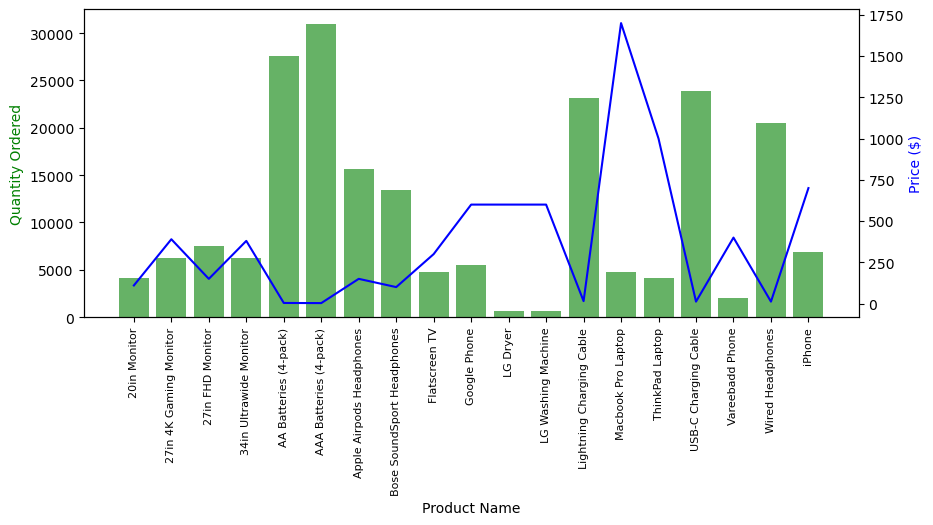

In [55]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='green',alpha = 0.6)
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

#### From the given data, which appears to show the quantity and prices of each product ordered, several interpretations can be made:

1. price Sensitivity: Products with lower prices but higher quantities ordered, such as "AAA Batteries (4-pack)" and "AA Batteries (4-pack)," may indicate price-sensitive purchases where customers are more likely to buy in bulk due to the lower price point. 
***

2. Premium Products:Premium products like "Macbook Pro Laptop" and "iPhone" have higher prices and relatively high quantities ordered, indicating strong demand for these high-end products despite their higher price tags.
***

3. Accessories vs. Electronics: Accessories like "USB-C Charging Cable" and "Lightning Charging Cable" have lower prices but higher quantities ordered, suggesting they are essential accessories often purchased alongside electronic devices.
***

4. High Revenue Products:Products with both high quantities ordered and high prices contribute significantly revenue. For example, "iPhone," "Macbook Pro Laptop," and "ThinkPad Laptop" are high-priced items with substantial quantities ordered, indicating strong sales performance and revenue generation.

